# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

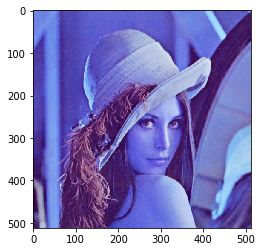

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

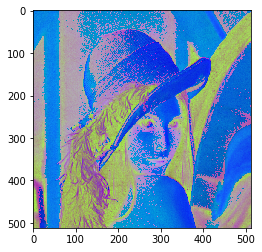

In [32]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

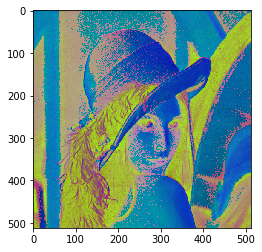

In [49]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., 2] = img_hsv_down[..., 2] / 255 - change_percentage
img_hsv_down[img_hsv_down[..., 2] < 0] = 0
img_hsv_down[..., 2] = img_hsv_down[..., 2] * 255
img_hsv_down = img_hsv_down.astype('uint8')
plt.imshow(img_hsv_down)
plt.show()

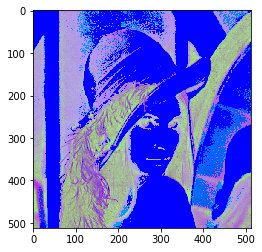

In [54]:
change_percentage = 0.2

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., 2] = img_hsv_up[..., 2] / 255 + change_percentage
img_hsv_up[img_hsv_up[..., 2] > 1] = 1
img_hsv_up[..., 2] = img_hsv_up[..., 2] * 255
img_hsv_up = img_hsv_up.astype('uint8')
plt.imshow(img_hsv_up)
plt.show() 

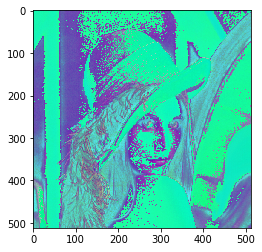

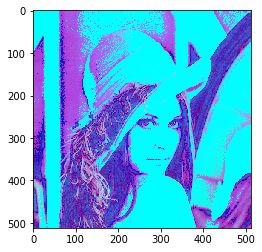

In [55]:
# 轉換 color space 回 BGR

img_hls_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_BGR2HSV)
img_hls_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_BGR2HSV)
plt.imshow(img_hls_down)
plt.show() 
plt.imshow(img_hls_up)
plt.show() 

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

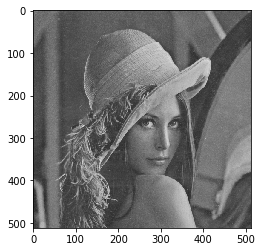

In [86]:
# case 1
# 每個 channel 個別做直方圖均衡
# 組合經過直方圖均衡的每個 channel
equalHist_by_channel_1 = cv2.cvtColor(img, cv2.IMREAD_COLOR)[..., 0]
img_bgr_equal = cv2.equalizeHist(equalHist_by_channel_1)
img[..., 0] = equalHist_by_channel_1

equalHist_by_channel_2 = cv2.cvtColor(img, cv2.IMREAD_COLOR)[..., 1]
img_bgr_equal = cv2.equalizeHist(equalHist_by_channel_2)
img[..., 1] = equalHist_by_channel_1

# equalHist_by_channel_3 = cv2.cvtColor(img, cv2.IMREAD_COLOR)[..., 2]
# img_bgr_equal = cv2.equalizeHist(equalHist_by_channel_3)
# img[..., 2] = equalHist_by_channel_1

plt.imshow(img)
plt.show()

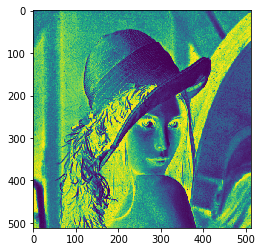

In [67]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = img_hsv[...,1]
img_hsv_equal_a = cv2.equalizeHist(img_hsv_equal)
plt.imshow(img_hsv_equal_a)
plt.show()

## 調整對比 / 明亮

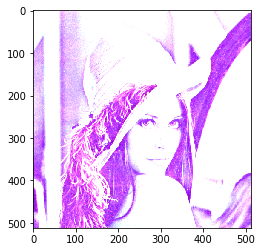

In [79]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=3.0, beta=0)
plt.imshow(add_contrast)
plt.show()

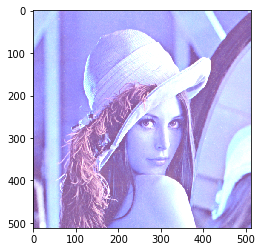

In [75]:
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=80)
plt.imshow(add_lighness)
plt.show()